<a href="https://colab.research.google.com/github/heokwon/Algorithm_Study/blob/main/Do_it!/4)%EC%8A%A4%ED%83%9D%EA%B3%BC_%ED%81%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **스택이란?**
스택(stack)은 데이터를 임시 저장할 때 사용하는 자료구조로, 데이터의 입력과 출력 순서는 후입선출(LIFO)방식이다.
* 후입선출 : 가장 나중에 넣은 데이터를 가장 먼저 꺼낸다.

푸시(push) : 스택에 데이터를 넣는 작업<br>
팝(pop) : 스택에서 데이터를 꺼내는 작업<bt>

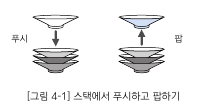<br>

그림 4-1 은 데이터를 스택에 푸시하고 팝하는 과정을 보여줌

겹쳐 쌓은 접시처럼 데이터를 넣고 꺼내는 작업을 맨 위부터 수행한다.
이렇게 푸시하고 팝하는 윗부분을 꼭대기(top)라 하고, 아랫부분을 바닥(bottom)이라고 한다.

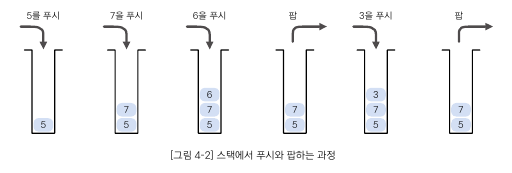<br>

그림 4-2 는 스택에서 푸시와 팝을 하는 예 이다. 푸시한 데이터는 스택 꼭대기에 쌓인다. 팝을 할 때는 꼭대기에 있는 데이터가 꺼내지므로 팝을 하면 방금 푸시한(푸시한 지 얼마 안 된) 데이터를 꺼낼 수 있다.

## 스택 구현하기
* 스택 배열: stk
  + 푸시한 데이터를 저장하는 스택 본체인 list형 배열.
  + 인덱스가 0인 원소를 스택의 바닥이라고 함.
  + 가장 먼저 푸시하여 데이터를 저장하는 곳은 stk[0]이다.
* 스택 크기: capacity
  + 스택의 최대 크기를 나타내는 int형 정수.
  + 이 값은 배열 stk의 원소 수인 len(stk)와 일치함.
* 스택 포인터: ptr
  + 스택에 쌓여 있는 데이터의 개수를 나타내는 정숫값, stack pointer
  + 스택이 비어 있으면 ptr의 값은 0이 되고 가득 차 있으면 capacity와 같은 값이 된다.
* 예외 처리 클래스 Empty
  + pop()함수 또는 peek()함수를 호출할 때 스택이 비어 있으면 내보내는 예외처리.
* 예외 처리 클래스 Full
  + push()함수를 호출할 때 스택이 가득 차 있으면 내보내는 예외처리.
* 초기화하는 __init__()함수
  + __init__()함수는 스택 배열을 생성하는 등의 준비 작업을 수행.
  + 매개변수 capacity로 전달받은 값을 스택의 크기를 나타내는 필드인 capacity로 복사하여 원소 수가 capacity이고 모든 원소가 None인 리스트형 stk를 생성
  + 이때 스택이 비어 있으므로 스택 포인터 ptr의 값을 0으로 함
* 쌓여 였는 데이터 개수를 알아내는 __len__()함수
  + __len__()함수는 스택에 쌓여 있는 데이터 개수를 반환.
  + 여기서는 스택 포인터 ptr값을 그대로 반환.
    - 예를 들어 스택 s의 원소 수는 s__len__() 또는 len(s)로 알아볼 수 있다.
* 스택이 비어 있는지를 판단하는 is_empty()함수
  + is_empty()함수는 데이터가 하나도 쌓여 있지 않은 상태, 즉 스택이 비어 있는지를 판단
  + 스택이 비어있으면 True, 그렇지 않으면 False 반환
* 스택이 가득 차 있는지를 판단하는 is_full() 함수
  + is_full() 함수는 더 이상 데이터를 푸시할 수 업슨 상태, 즉 스택이 가득 차 있는지 판단.
  + 스택이 가득 차 있으면 True, 그렇지 않으면 False 반환

In [8]:
## 실습 4-1 [A]
# fixed_stack.py 로 저장

# 고정 길이 스택 클래스 FixedStack 구현하기

from typing import Any

class FixedStack:
    """고정 길이 스택 클래스"""

    class Empty(Exception):
        """비어 있는 FixedStack에 팝 또는 피크할 때 내보내는 예외 처리"""
        pass
    class Full(Exception):
        """가득 찬 FixedStack에 푸시할 떄 내보내는 예외 처리"""
        pass
    
    def __init__(self, capacity: int=256) -> None:
        """스택 초기화"""
        self.stk = [None] * capacity # 스택 본체
        self.capacity = capacity     # 스택의 크기
        self.ptr = 0                 # 스택 포인터

    def __len__(self) -> int:
        """스택에 쌓여 있는 데이터 개수를 반환"""
        return self.ptr
    
    def is_empty(self) -> bool:
        """스택이 비어 있는지 판단"""
        return self.ptr <= 0
    
    def is_full(self) -> bool:
        """스택이 가득 차 있는지 판단"""
        return self.ptr >= self.capacity

## 실습 4-1[B]
    def push(self, value: Any) -> None:
        """스택에 value를 푸시(데이터를 넣음)"""
        if self.is_full():           # 스택이 가득 차 있는 경우
            raise FixedStack.Full    # 예외처리 발생
        self.stk[self.ptr] = value
        self.ptr += 1

    def pop(self) -> Any:
        """스택에서 데이터를 팝(꼭대기 데이터를 꺼냄)"""
        if self.is_empty():          # 스택이 비어 있는 경우
            raise FixedStack.Empty   # 예외 처리 발생
        self.ptr -= 1
        return self.stk[self.ptr]

    def peek(self) -> Any:
        """스택에서 데이터를 피크(꼭대기 데이터를 들여다봄)"""
        if self.is_empty():          # 스택이 비어 있음
            raise FixedStack.Empty   # 예외 처리 발생
        return self.stk[self.ptr-1]

    def clear(self) -> None:
        """스택을 비움(모든 데이터를 삭제)"""
        self.ptr = 0

## 실습 4-1[C]
    def find(self, value: Any) -> Any:
        """스택에서 value를 찾아 인덱스를 반환(없으면 -1을 반환)"""
        for i in range(self.ptr-1, -1, -1):    # 꼭대기 부터 선형 검색
            if self.stk[i] == value:
                return i                       # 검색 성공
        return -1                              # 검색 실패

    def count(self, value: Any) -> int:
        """스택에 있는 value의 개수를 반환"""
        c = 0
        for i in range(self.ptr):              # 바닥부터 선형 검색
            if self.stk[i] == value:           # 검색 성공
                c += 1
        return c

    def __contains__(self, value: Any) -> bool:
        """스택에 value가 있는지 판단"""
        return self.count(value) > 0

    def dump(self) -> None:
        """덤프(스택 안의 모든 데이터를 바닥부터 꼭대기 순으로 출력)"""
        if self.is_empty():                     # 스택이 비어 있음
            print('스택이 비어 있습니다.')
        else:
            print(self.stk[:self.ptr])

### 예외 처리의 기본 구조
프로그램을 실행하다가 오류가 발생하면 예외 처리 메시지를 내보낼 수 있다.
예외 처리를 수행하면 오류를 복구하여 프로그램이 실행되다가 중단되는 것을 피할 수 있다.

또한 예외 처리는 원래 처리하는 코드와 오류가 발생할 때 대처하는 코드를 분리할 수 있다는 장점이 있다.

* 데이터를 푸시하는 push()함수
  + push()함수는 스택에 데이터를 추가한다. 그러나 스택이 가득 차서 더 이상 푸시할 수 없는 경우에는 FixedStack.Full을 통하여 예외 처리를 내보낸다.
* 데이터를 팝하는 pop()함수
  + pop()함수는 스택의 꼭대기에서 데이터를 꺼내서 그 값을 반환한다. 그러나 스택이 비어서 팝할 수 없는 경우, FixedStack.Empty를 통하여 예외 처리를 내보낸다.
* 데이터를 들여다보는 peek()함수
  + peek()함수는 스택의 꼭대기 데이터(다음에 팝하는 데이터)를 들여다본다.
  + 그러나 스택이 비어있는 경우에는 FixedStack.Empty를 통하여 예외처리를 내보낸다.
  + 스택이 비어있지 않으면 꼭대기 원소 stk[ptr-1]의 값을 반환한다.
  + 데이터의 입출력이 없으므로 스택 포인터는 변화하지 않는다.
* 스택의 모든 데이터를 삭제하는 clear()함수
  + clear()함수는 스택에 쌓여 있는 데이터를 모두 삭제하여 빈 스택을 만든다.
  + 스택 포인터 ptr의 값을 0으로 하면 끝난다.

In [5]:
# ## 실습 4-1[B]
# ### 위 실습 4-1[A]에 이어서...

# def push(self, value: Any) -> None:
#     """스택에 value를 푸시(데이터를 넣음)"""
#     if self.is_full():           # 스택이 가득 차 있는 경우
#         raise FixedStack.Full    # 예외처리 발생
#     self.stk[self.ptr] = value
#     self.ptr += 1

# def pop(self) -> Any:
#     """스택에서 데이터를 팝(꼭대기 데이터를 꺼냄)"""
#     if self.is_empty():          # 스택이 비어 있는 경우
#         raise FixedStack.Empty   # 예외 처리 발생
#     self.ptr -= 1
#     return self.stk[self.ptr]

# def peek(self) -> Any:
#     """스택에서 데이터를 피크(꼭대기 데이터를 들여다봄)"""
#     if self.is_empty():          # 스택이 비어 있음
#         raise FixedStack.Empty   # 예외 처리 발생
#     return self.stk[self.ptr-1]

# def clear(self) -> None:
#     """스택을 비움(모든 데이터를 삭제)"""
#     self.ptr = 0

### raise문을 통한 예외 처리
raise문으로 프로그램의 예외 처리를 의도적으로 내보낼 수 있다.
실습 4-1에서 FixedStack클래스의 push(), pop(), peek() 함수는 스택이 가득 차 있거나 또는 비어 있을 때 raise문을 통하여 예외 처리를 내보내고 있다.

ValueError 클래스, ZeroDivisionError 클래스 등 파이썬이 제공하는 예외 처리를 표준 내장 예외 처리라고 한다. 표준 내장 예외 처리는 BaseException 클래스와 직간접적으로 파생한 클래스로 제공된다.

프로그래머가 정의하는 사용자 정의 예외 처리는 BaseException 클래스가 아니라 Exception 클래스는 사용자 정의 클래스가 파생하는 것을 전제로 하기 때문이다.

04장에서 다루는 스택 클래스와 큐 클래스인 Empty와 Full은 모두 Exception 클래스의 하위 클래스로 정의하고 있다.

* 데이터를 검색하는 find()함수
  + finc()함수는 스택 본체의 배열 stk안에 value와 값이 같은 데이터가 포함되어 있는지 확인하고, 포함되어 있다면 배열의 어디에 들어가 있는지를 검색
  + 검색은 꼭대기 쪽에서 바닥 쪽으로 선형 검색을 한다.
  + 즉, 배열의 인덱스가 큰 쪽에서 작은 쪽으로 스캔을 한다.
  + 검색에 성공하면 발견한 인덱스를 반환하고, 실패하면 -1을 반환한다.
* 데이터 개수를 세는 count()함수
  + count()함수는 스택에 쌓여 있는 데이터(value)의 개수를 구하여 반환한다.
* 데이터가 포함되어 있는지 판단하는 __contains__()함수
  + __contains__()함수는 스택에 데이터(value)가 있는지 판단한다.
  + 있으면 True를 반환하고 그렇지 않으면 False를 반환한다.
  + 예를 들어 스택 s에 데이터 x가 포함되어 있는지 판단은 s.__contains__(x)뿐만 아니라 멤버십 판단 연산자 (membership test operator)인 in을 사용하여 x in s 로 수행할 수 있다.
* 스택의 모든 데이터를 출력하는 dump()함수
  + dump()함수는 스택에 쌓여 있는 ptr개의 모든 데이터를 바닥부터 꼭대기까지 순서대로 출력한다.
  + 스택이 비어 있으면 '스택이 비어 있습니다.'를 출력한다.

In [ ]:
# ## 실습 4-1[C]
# ### 위 실습 4-1[A],[B]에 이어서...
# def find(self, value: Any) -> Any:
#     """스택에서 value를 찾아 인덱스를 반환(없으면 -1을 반환)"""
#     for i in range(self.ptr-1, -1, -1):    # 꼭대기 부터 선형 검색
#         if self.stk[i] == value:
#             return i                       # 검색 성공
#     return -1                              # 검색 실패

# def count(self, value: Any) -> int:
#     """스택에 있는 value의 개수를 반환"""
#     c = 0
#     for i in range(self.ptr):              # 바닥부터 선형 검색
#         if self.stk[i] == value:           # 검색 성공
#             c += 1
#     return c

# def __contains__(self, value: Any) -> bool:
#     """스택에 value가 있는지 판단"""
#     return self.count(value) > 0

# def dump(self) -> None:
#     """덤프(스택 안의 모든 데이터를 바닥부터 꼭대기 순으로 출력)"""
#     if self.is_empty():                     # 스택이 비어 있음
#         print('스택이 비어 있습니다.')
#     else:
#         print(self.stk[:self.ptr])

### 보충
파이썬에서 시작과 끝에 언더스코어(_)가 2개 붙은 함수는 특별한 의미가 있다.
* __len__() 함수
  + 클래스에 __len__()함수를 정의하면 클래서형의 인스턴스를 len()함수에 전달할 수 있다.
  + 예를 들어 클래스형의 인스턴스 obj 에 대한 __len__()함수를 호출하는 obj.__len__()를 간단히 len(obj)로 작성할 수 있다.

## 스택 프로그램 만들기
고정 길이 스택 FixedStack클래스를 사용한 실습 4-2를 살펴보자.

In [11]:
# 고정 길이 스택 클래스 FixedStack 사용하기
# fixed_stack_test.py 저장

# # 실습 4-1 py파일로 저장 후 불러오기
from enum import Enum
# from fixed_stack import FixedStack

Menu = Enum('Menu', ['푸시','팝','피크','검색','덤프','종료'])

def select_menu() -> Menu:
    """메뉴 선택"""
    s = [f'({m.value}){m.name}' for m in Menu]
    while True:
        print(*s, sep = '  ', end='')
        n = int(input(': '))
        if 1 <= n <= len(Menu):
            return Menu(n)
s = FixedStack(64)              # 최대 64개를 푸시할 수 있는 스택

while True:
    print(f'현재 데이터 개수: {len(s)} / {s.capacity}')
    menu = select_menu()        # 메뉴 선택

    if menu == Menu.푸시:       # 푸시
        x = int(input('데이터를 입력하세요.: '))
        try:
            s.push(x)
        except FixedStack.Full:
            print('스택이 가득 차 있습니다.')

    elif menu == Menu.팝:
        try:
            x = s.pop()
            print(f'팝한 데이터는 {x}입니다.')
        except FixedStack.Empty:
            print('스택이 비어 있습니다.')

    elif menu == Menu.피크:
        try:
            x = s.peek()
            print(f'피크한 데이터는 {x}입니다.')
        except FixedStack.Empty:
            print('스택이 비어 있습니다.')

    elif menu == Menu.검색:
        x = int(input('검색할 값을 입력하세요.: '))
        if x in s:
            print(f'{s.count(x)}개 포함되고, 맨 앞의 위치는 {s.find(x)}입니다.')
        else:
            print('검색값을 찾을 수 없습니다.')

    elif menu == Menu.덤프:
        s.dump()

    else:
        break

현재 데이터 개수: 0 / 64
(1)푸시  (2)팝  (3)피크  (4)검색  (5)덤프  (6)종료: 1
데이터를 입력하세요.: 1
현재 데이터 개수: 1 / 64
(1)푸시  (2)팝  (3)피크  (4)검색  (5)덤프  (6)종료: 1
데이터를 입력하세요.: 2
현재 데이터 개수: 2 / 64
(1)푸시  (2)팝  (3)피크  (4)검색  (5)덤프  (6)종료: 1
데이터를 입력하세요.: 3
현재 데이터 개수: 3 / 64
(1)푸시  (2)팝  (3)피크  (4)검색  (5)덤프  (6)종료: 1
데이터를 입력하세요.: 1
현재 데이터 개수: 4 / 64
(1)푸시  (2)팝  (3)피크  (4)검색  (5)덤프  (6)종료: 1
데이터를 입력하세요.: 5
현재 데이터 개수: 5 / 64
(1)푸시  (2)팝  (3)피크  (4)검색  (5)덤프  (6)종료: 4
검색할 값을 입력하세요.: 1
2개 포함되고, 맨 앞의 위치는 3입니다.
현재 데이터 개수: 5 / 64
(1)푸시  (2)팝  (3)피크  (4)검색  (5)덤프  (6)종료: 3
피크한 데이터는 5입니다.
현재 데이터 개수: 5 / 64
(1)푸시  (2)팝  (3)피크  (4)검색  (5)덤프  (6)종료: 2
팝한 데이터는 5입니다.
현재 데이터 개수: 4 / 64
(1)푸시  (2)팝  (3)피크  (4)검색  (5)덤프  (6)종료: 2
팝한 데이터는 1입니다.
현재 데이터 개수: 3 / 64
(1)푸시  (2)팝  (3)피크  (4)검색  (5)덤프  (6)종료: 5
[1, 2, 3]
현재 데이터 개수: 3 / 64
(1)푸시  (2)팝  (3)피크  (4)검색  (5)덤프  (6)종료: 6


## collections.deque로 스택 구현하기
파이썬의 내장 컨테이너는 딕셔너리, 리스트, 집합, 튜플이 있다.
이 외에도 여러 컨테이너를 collections 모듈로 제공한다. 주요 컨테이너는 namedtuple(), deque, ChainMap, Counter, OrderedDict, defaultdict, UserDict, UserList, UserList, UserString 같은 컬렉션이다.

이 가운데 deque모듈을 사용하면 스택을 간단하게 구현할 수 있다. collentcion.deque는 맨 앞과 맨 끝 양쪽에서 원소를 추가,삭제하는 자료구조인 덱(deque)을 구현하는 컨테이너이다.

deque의 주요 속성과 함수는 다음과 같다
* maxien 속성
  + deque의 최대 크기를 나타내는 속성으로 읽기전용
  + 크기 제한이 없으면 None 이다.
* append(x) : deque의 맨 끝(오른쪽)에 x를 추가
* appendleft(x) : deque의 맨 앞(왼쪽)에 x를 추가
* clear() : deque의 모든 원소를 삭제하고 크기를 0으로 함
* copy() : deque의 얕은 복사(shallow copy)를 함
* count(x) : deque안에 있는 x와 같은 원소의 개수를 계산
* extend(iterable) : 순차 반복 인수 iterable에서 가져온 원소를 deque의 맨 끝(오른쪽)에 추가하여 확장
* extendleft(iterable) : 순차 반복 인수 iterable에서 가져온 원소를 deque의 맨 앞(왼쪽)에 추가하여 확장
* index(x[, start[,stop]])
  + deque안에 있는(인덱스 start부터 인덱스 stop까지 양 끝을 포함한 범위)x 가운데 가장 앞쪽에 있는 원소의 위치를 반환
  + x가 없는 경우는 ValueError를 내보냄
* insert(i, x)
  + x를 deque의 i위치에 삽입
  + 이때 크기에 제한이 있는 deque일 경우 maxien을 초과한 삽입은 indexError를 내보냄
* pop() : deque의 맨 끝에 있는 원소를 1개 삭제하고 그 원소를 반환
* popleft() : deque의 맨 앞에 있는 원소를 1개 삭제하고 그 원소를 반환
* remove(value) : value의 첫 번쨰 항목을 삭제, 원소가 없는 경우 ValueError
* reverse() : deque 원소를 역순으로 재정렬하고 None을 반환
* rotate(n=1) : deque의 모든 원소를 n값만큼 오른쪽으로 밀어냄, n이 음수라면 왼쪽으로 밀어냄

이 외에도 이터레이션과 pickle, len(), reversed(), copy.copy(), copy.deepcopy(), in연산자로 멤버십 판단, d[0] 등의 형식에서 인덱스에 의한 참조를 지원한다.

양쪽 끝의 데이터를 인덱스로 접근하는 것은 O(1)로 빠르지만, 가운데 부분에 있는 데이터를 접근하는 것은 O(n)으로 느리다. 그러므로 인덱스를 사용하여 임의의 원소를 무작위로 접근하는 것은 효율적이지 않다.

다음 실습 4C-1의 Stack 클래스는 deque를 사용하여 고정 길이의 스택을 구현했다.
기본 동작은 실습 4-1에서 작성한 FixedStack 클래스와 같다. collections.deque와 같은 표준 라이브러리는 빠른 동작을 기대할 수 있고 프로그램이 간단하다는 점에서 FixedStack보다 Stack클래스가 프로그램 기능 면에서 우수하다고 볼 수 있다.(그러나 자료구조를 배우려면 FixedStack 클래스를 이해해야 한다.)

In [12]:
# 고정 길이 스택 클래스 구현하기(collections.deque 사용)
# stack.py 저장

from typing import Any
from collections import deque

class Stack:
    """고정 길이 스택 클래스(collections.deque를 사용)"""

    def __init__(self, maxlen: int=256) -> None:
        """스택 초기화"""
        self.capacity = maxlen
        self.__stk = deque([], maxlen)

    def __len__(self) -> int:
        """스택에 쌓여 있는 데이터 개수를 반환"""
        return len(self.__stk)
    
    def is_empty(self) -> bool:
        """스택이 비어 있는지 판단"""
        return not self.__stk

    def is_full(self) -> bool:
        """스택이 가득 차 있는지 판단"""
        return len(self.__stk) == self.__stk.maxlen

    def push(self, value: Any) -> None:
        """스택에 value를 푸시"""
        self.__stk.append(value)

    def pop(self) -> Any:
        """스택에서 데이터를 팝"""
        return self.__stk.pop()
    
    def peek(self) -> Any:
        """스택에서 데이터를 피크"""
        return self.__stk[-1]

    def clear(self) -> None:
        """스택을 비움"""
        self.__stk.clear
    
    def find(self, value: Any) -> Any:
        """스택에서 value를 찾아 인덱스를 반환(찾지 못하면 -1 리턴)"""
        try:
            return self.__stk.index(value)
        except ValueError:
            return -1

    def count(self, value: Any) -> int:
        """스택에 포함되어 있는 value의 개수를 반환"""
        return self.__stk.count(value)
    
    def __contains__(self, value: Any) -> bool:
        """스택에 value가 포함되어 있는지 판단"""
        return self.count(value)
    
    def dump(self) -> int:
        """스택 안에 있는 모든 데이터를 나열(바닥에서 꼭대기 순으로 출력)"""
        print(list(self.__stk))